In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


warnings.filterwarnings('ignore')

In [2]:
def loading_preprocessing(path):
    img_list = []
    for img_path in os.listdir(path):
        img= cv2.imread(path + '/' + img_path)
           
        img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img= cv2.resize(img,(255,255))
        img= img/255
        img_list.append(img)
    return img_list    

In [3]:
train_class1 = loading_preprocessing('train/NORMAL/')
train_class2 = loading_preprocessing('train/PNEUMONIA/')

train_list = train_class1 + train_class2


normal_labels = [0]* len(train_class1)
sick_labels =  [1]* len(train_class2)

train_labels = normal_labels + sick_labels

print("length of inputs: " , len(train_list))
print("length of outputs: ", len(train_labels))




length of inputs:  5216
length of outputs:  5216


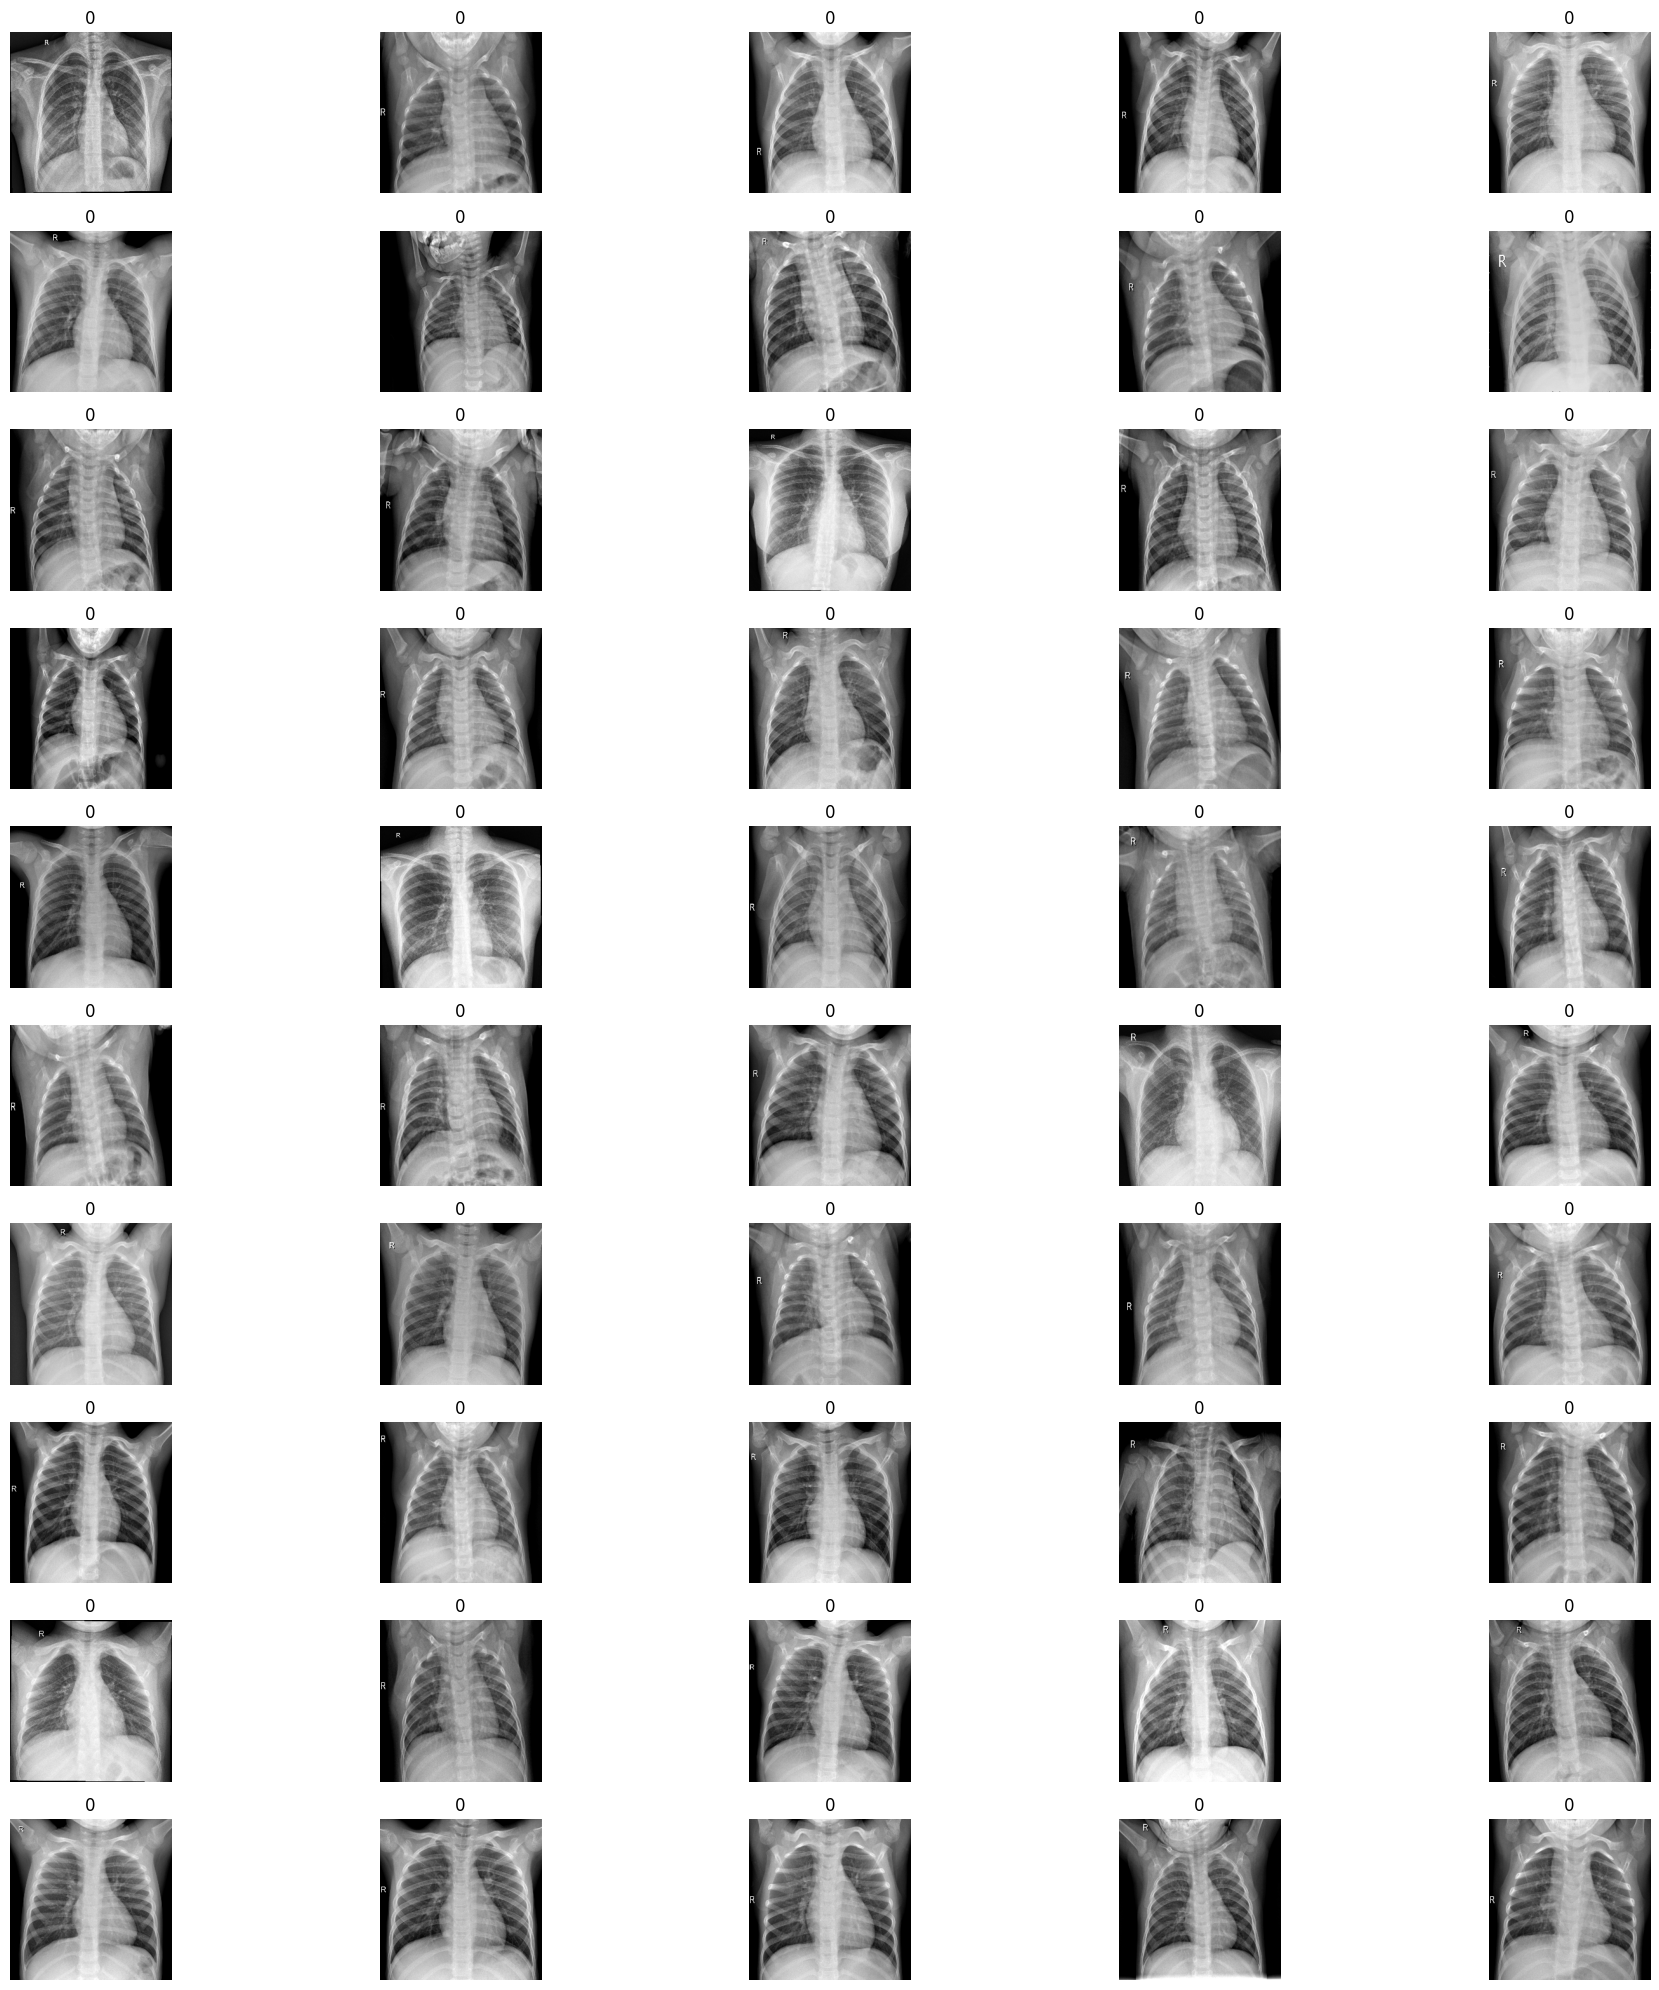

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
for i, (img, label) in enumerate(zip(train_class1[:50], normal_labels[:50])):  # Limit to 50 images
    plt.subplot(10, 5, i + 1)  # Use 10x5 grid for 50 images
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')  # Hide axis for better visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()



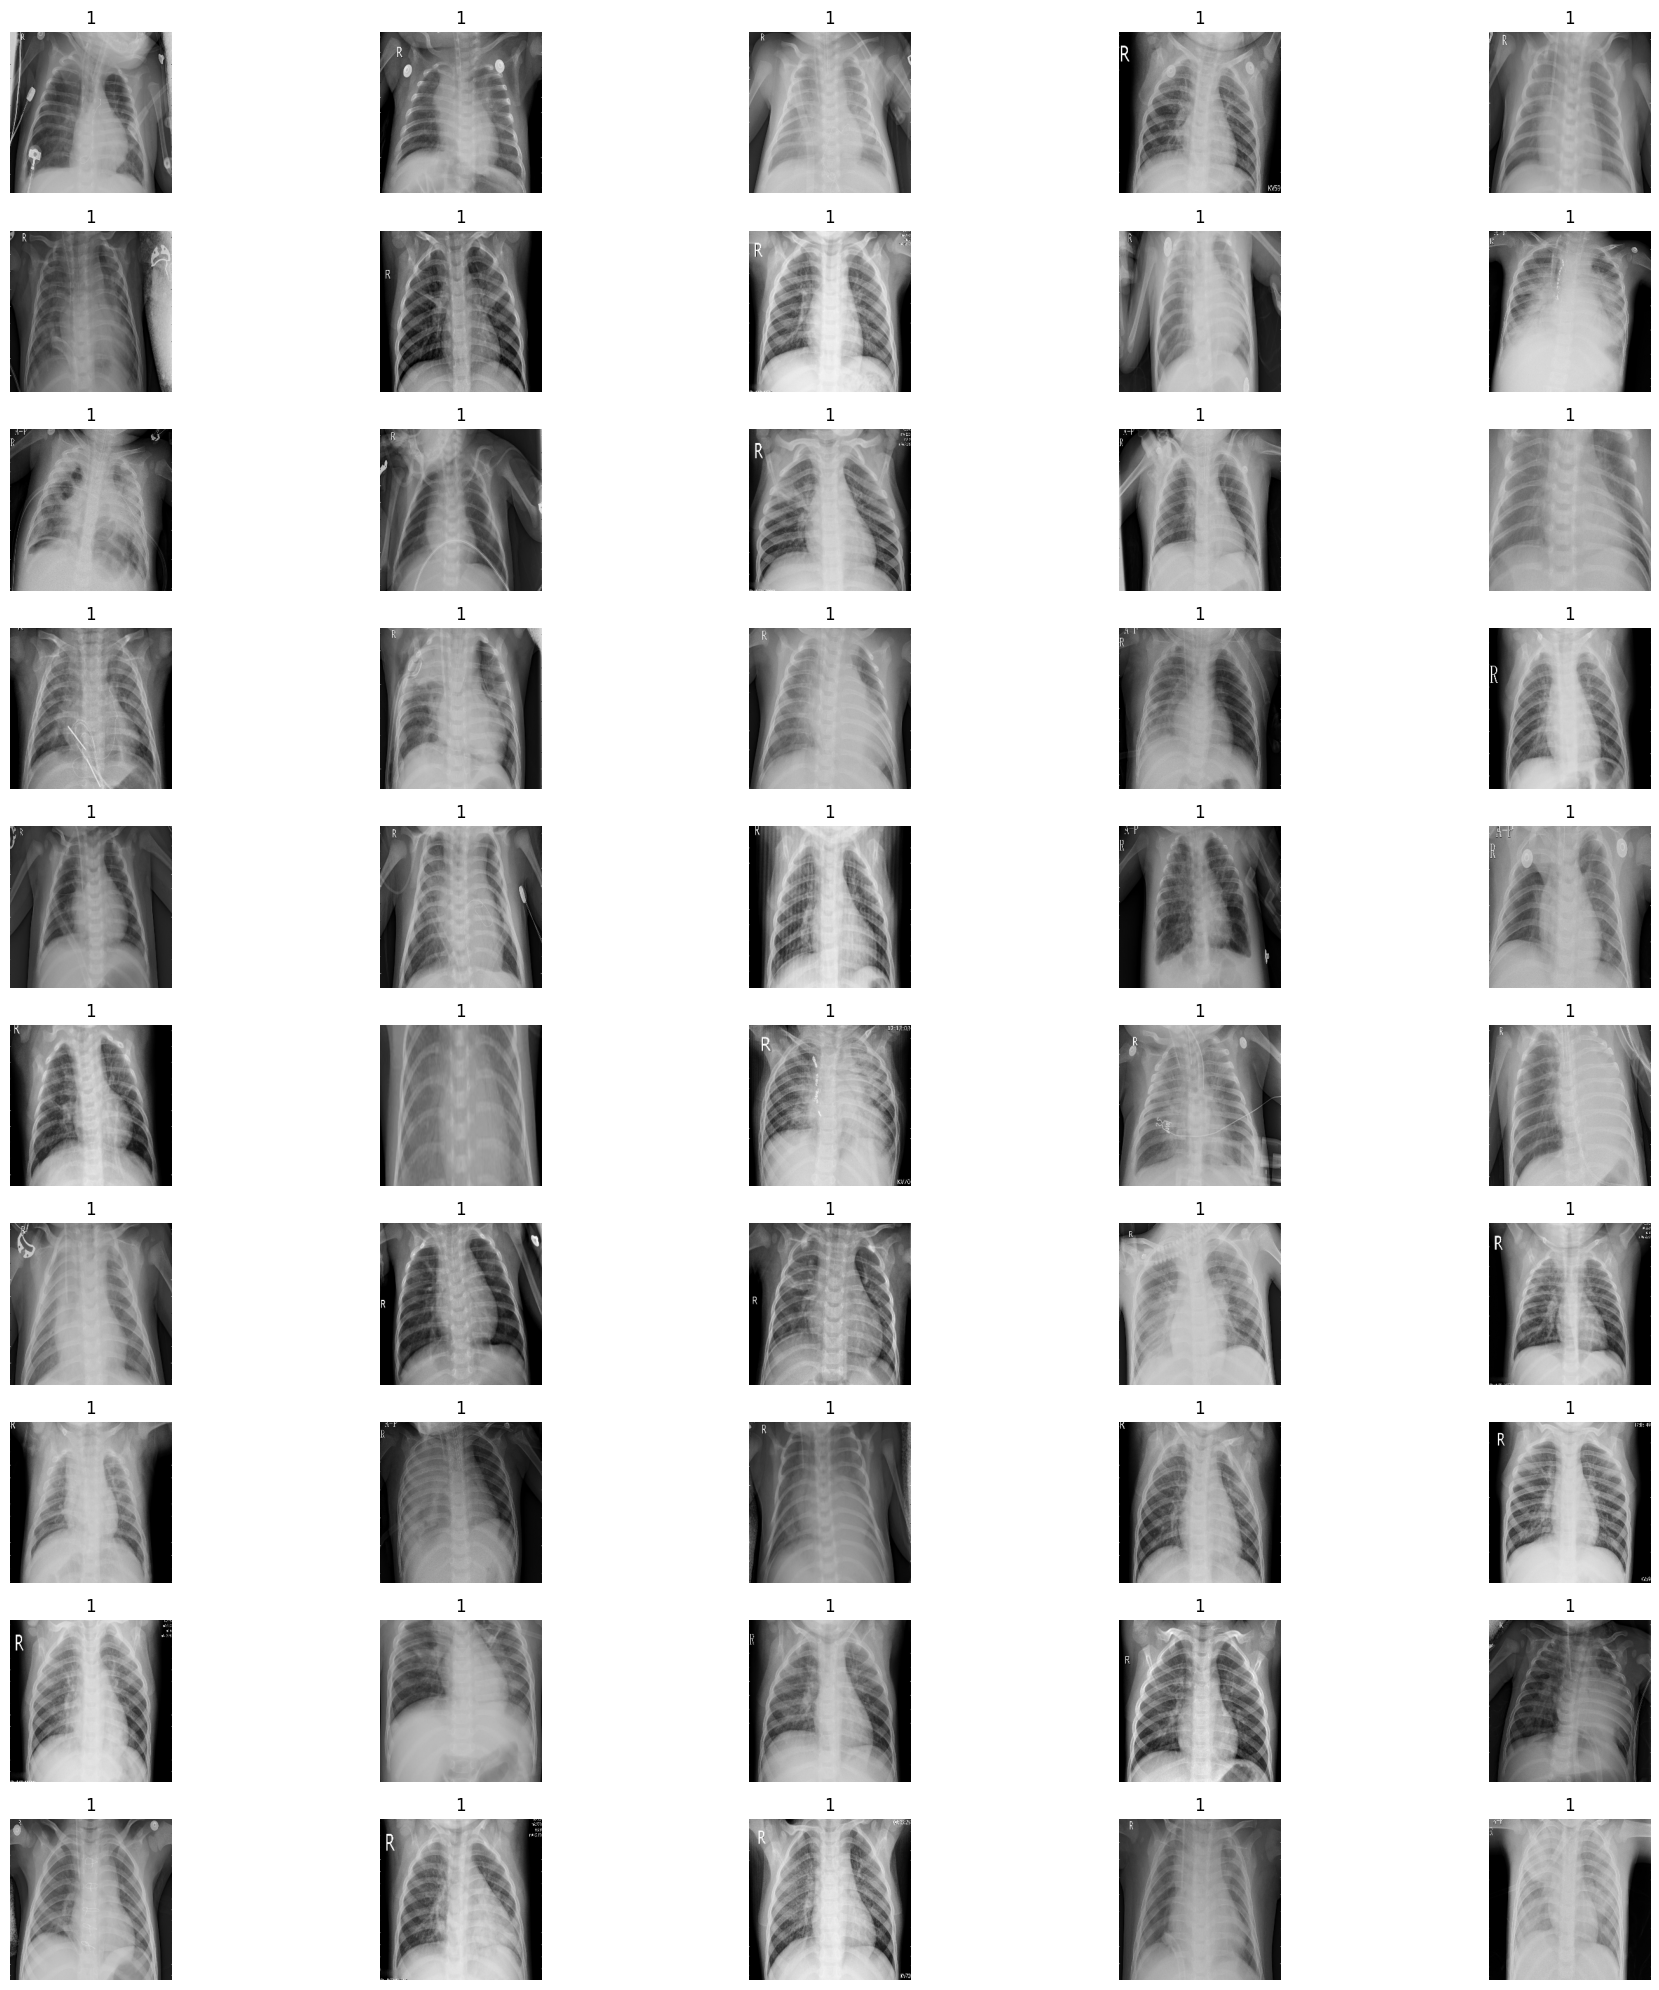

In [5]:


plt.figure(figsize=(20, 20))
for i, (img, label) in enumerate(zip(train_class2[:50], sick_labels[:50])):  # Limit to 50 images
    plt.subplot(10, 5, i + 1)  # Use 10x5 grid for 50 images
    plt.imshow(img)
    plt.title(label)
    plt.axis('off')  # Hide axis for better visualization
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


In [6]:
test_class1 = loading_preprocessing('test/NORMAL/')
test_class2 = loading_preprocessing('test/PNEUMONIA/')

test_list = test_class1 + test_class2


test_normal_labels = [0]* len(test_class1)
test_sick_labels =  [1]* len(test_class2)

test_labels = test_normal_labels + test_sick_labels

print("length of inputs: " , len(test_list))
print("length of outputs: ", len(test_labels))

length of inputs:  624
length of outputs:  624


In [7]:
x_train = np.array(train_list)
x_test = np.array(test_list)

In [8]:
import tensorflow as tf
from tensorflow.keras import models , layers , utils

In [9]:
y_train = utils.to_categorical(train_labels, num_classes=2)
y_test = utils.to_categorical(test_labels, num_classes=2)

In [10]:
model = models.Sequential()
model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same' , strides=1, activation='relu', input_shape=(x_train[0].shape)))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Conv2D(32, kernel_size=(3,3) , padding='same' , strides=1 , activation='relu'))
model.add(layers.MaxPool2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 255, 255, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 127, 127, 32)   │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 127008)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    16,257,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,281,602 (62.11 MB)

 Trainable params: 16,281,602 (62.11 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss='categorical_crossentropy' , optimizer='adam' , metrics=['accuracy'])
model.fit(x_train , y_train , epochs=5 , validation_data=(x_test, y_test))

Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 125s 764ms/step - accuracy: 0.8225 - loss: 0.6763 - val_accuracy: 0.8157 - val_loss: 0.5364
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 150s 918ms/step - accuracy: 0.9631 - loss: 0.1043 - val_accuracy: 0.8093 - val_loss: 0.6270
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 138s 843ms/step - accuracy: 0.9710 - loss: 0.0693 - val_accuracy: 0.7163 - val_loss: 1.3438
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 140s 856ms/step - accuracy: 0.9866 - loss: 0.0378 - val_accuracy: 0.7356 - val_loss: 1.1111
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 129s 793ms/step - accuracy: 0.9933 - loss: 0.0210 - val_accuracy: 0.7276 - val_loss: 1.7860


In [16]:
preds = model.predict(x_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step


In [17]:
PREDS = np.argmax(np.round(preds), axis=1)
PREDS

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

ValueError: num must be an integer with 1 <= num <= 25, not 26

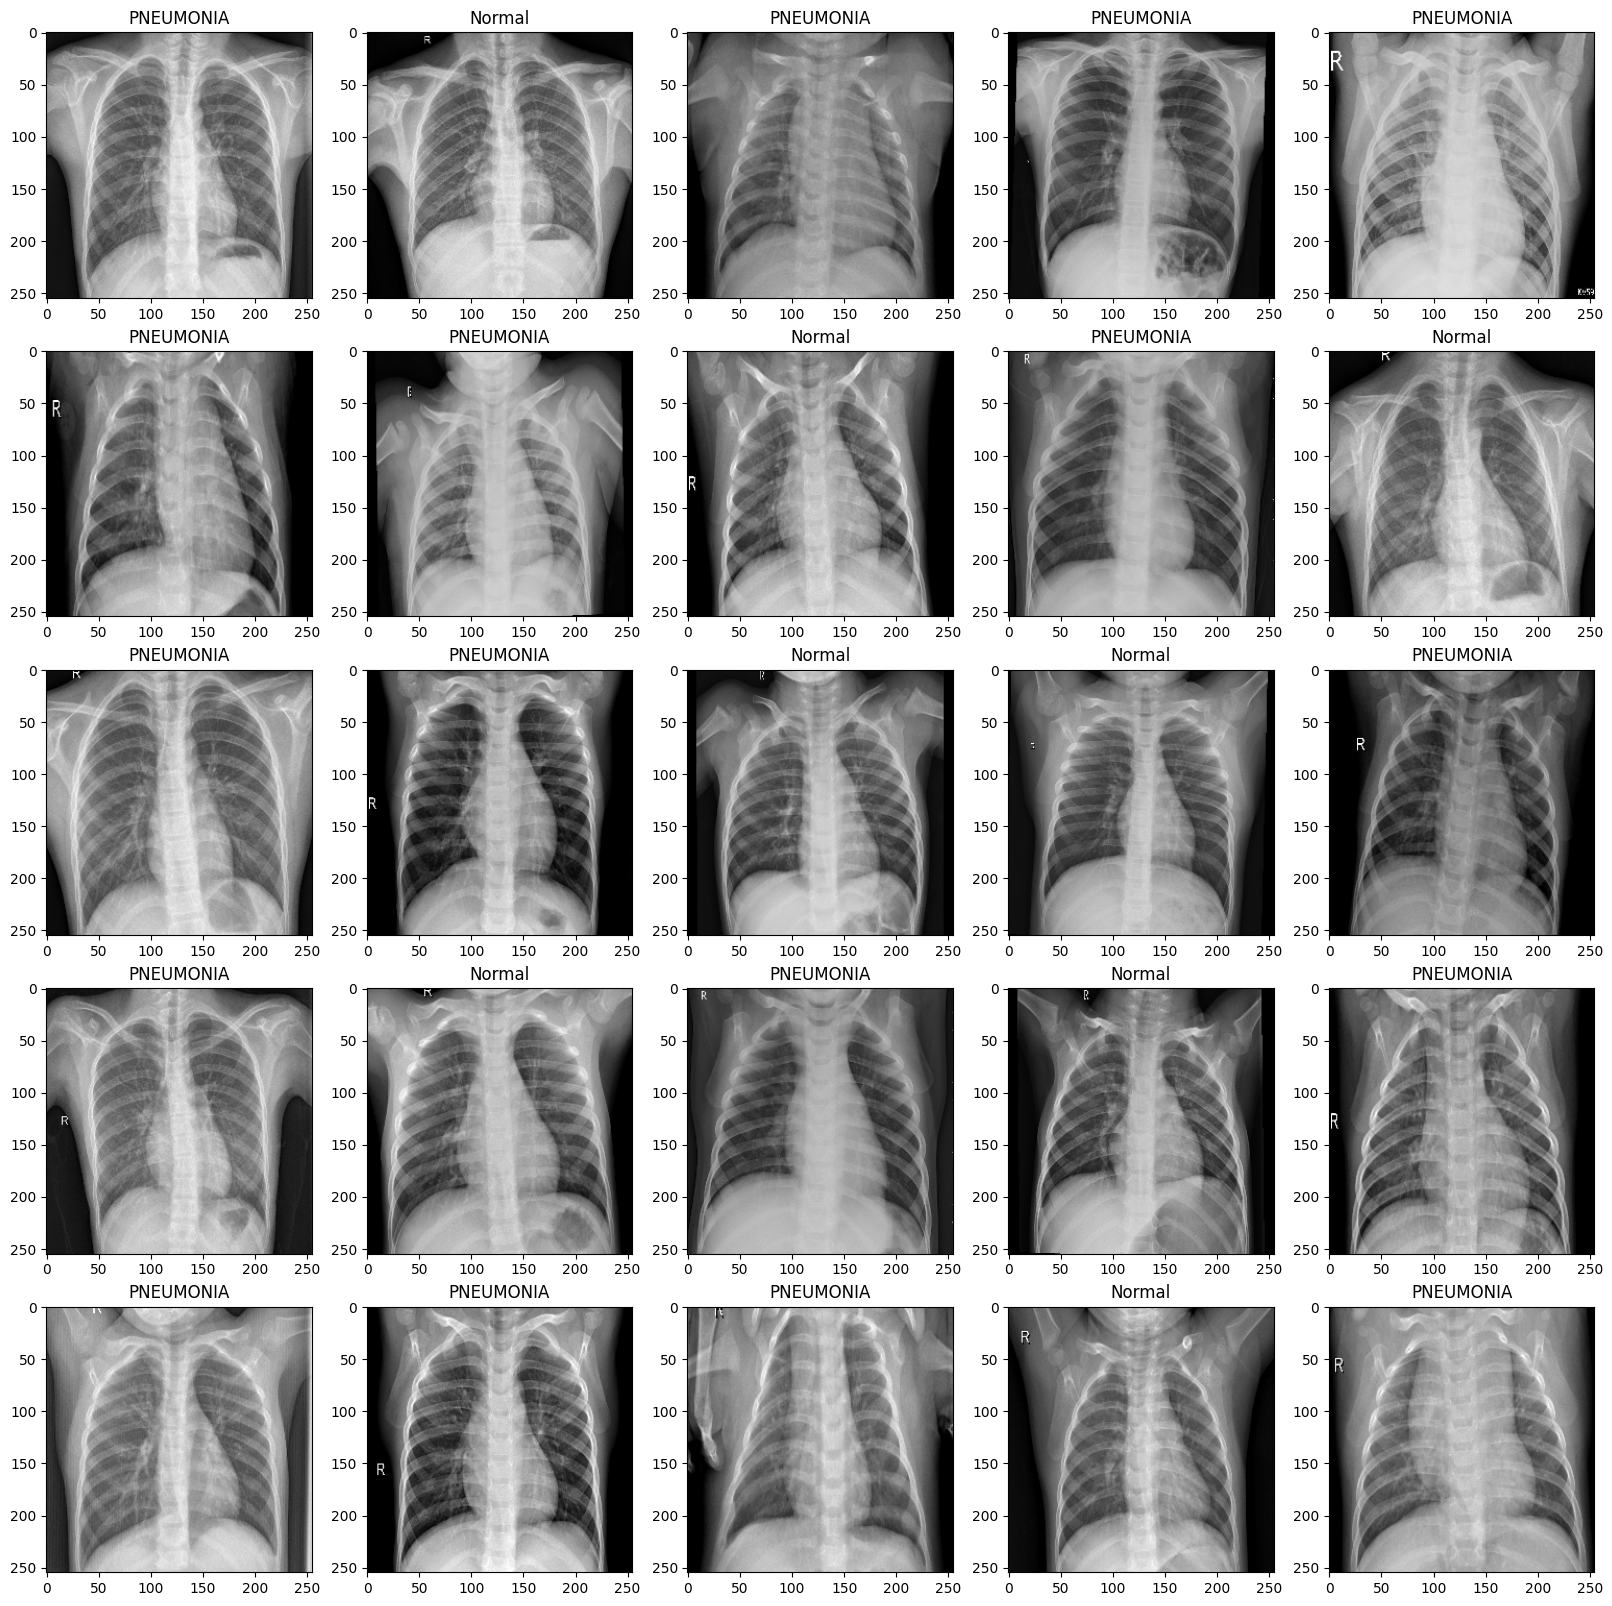

In [18]:
plt.figure(figsize=(20,20))
for i, (img, pred) in enumerate(zip(test_list, PREDS)):

    plt.subplot(5,5 , i+1)
    if pred == 0:
        pred = 'Normal'
    elif pred == 1:
        pred = 'PNEUMONIA' 

    plt.imshow(img), plt.title(pred)       

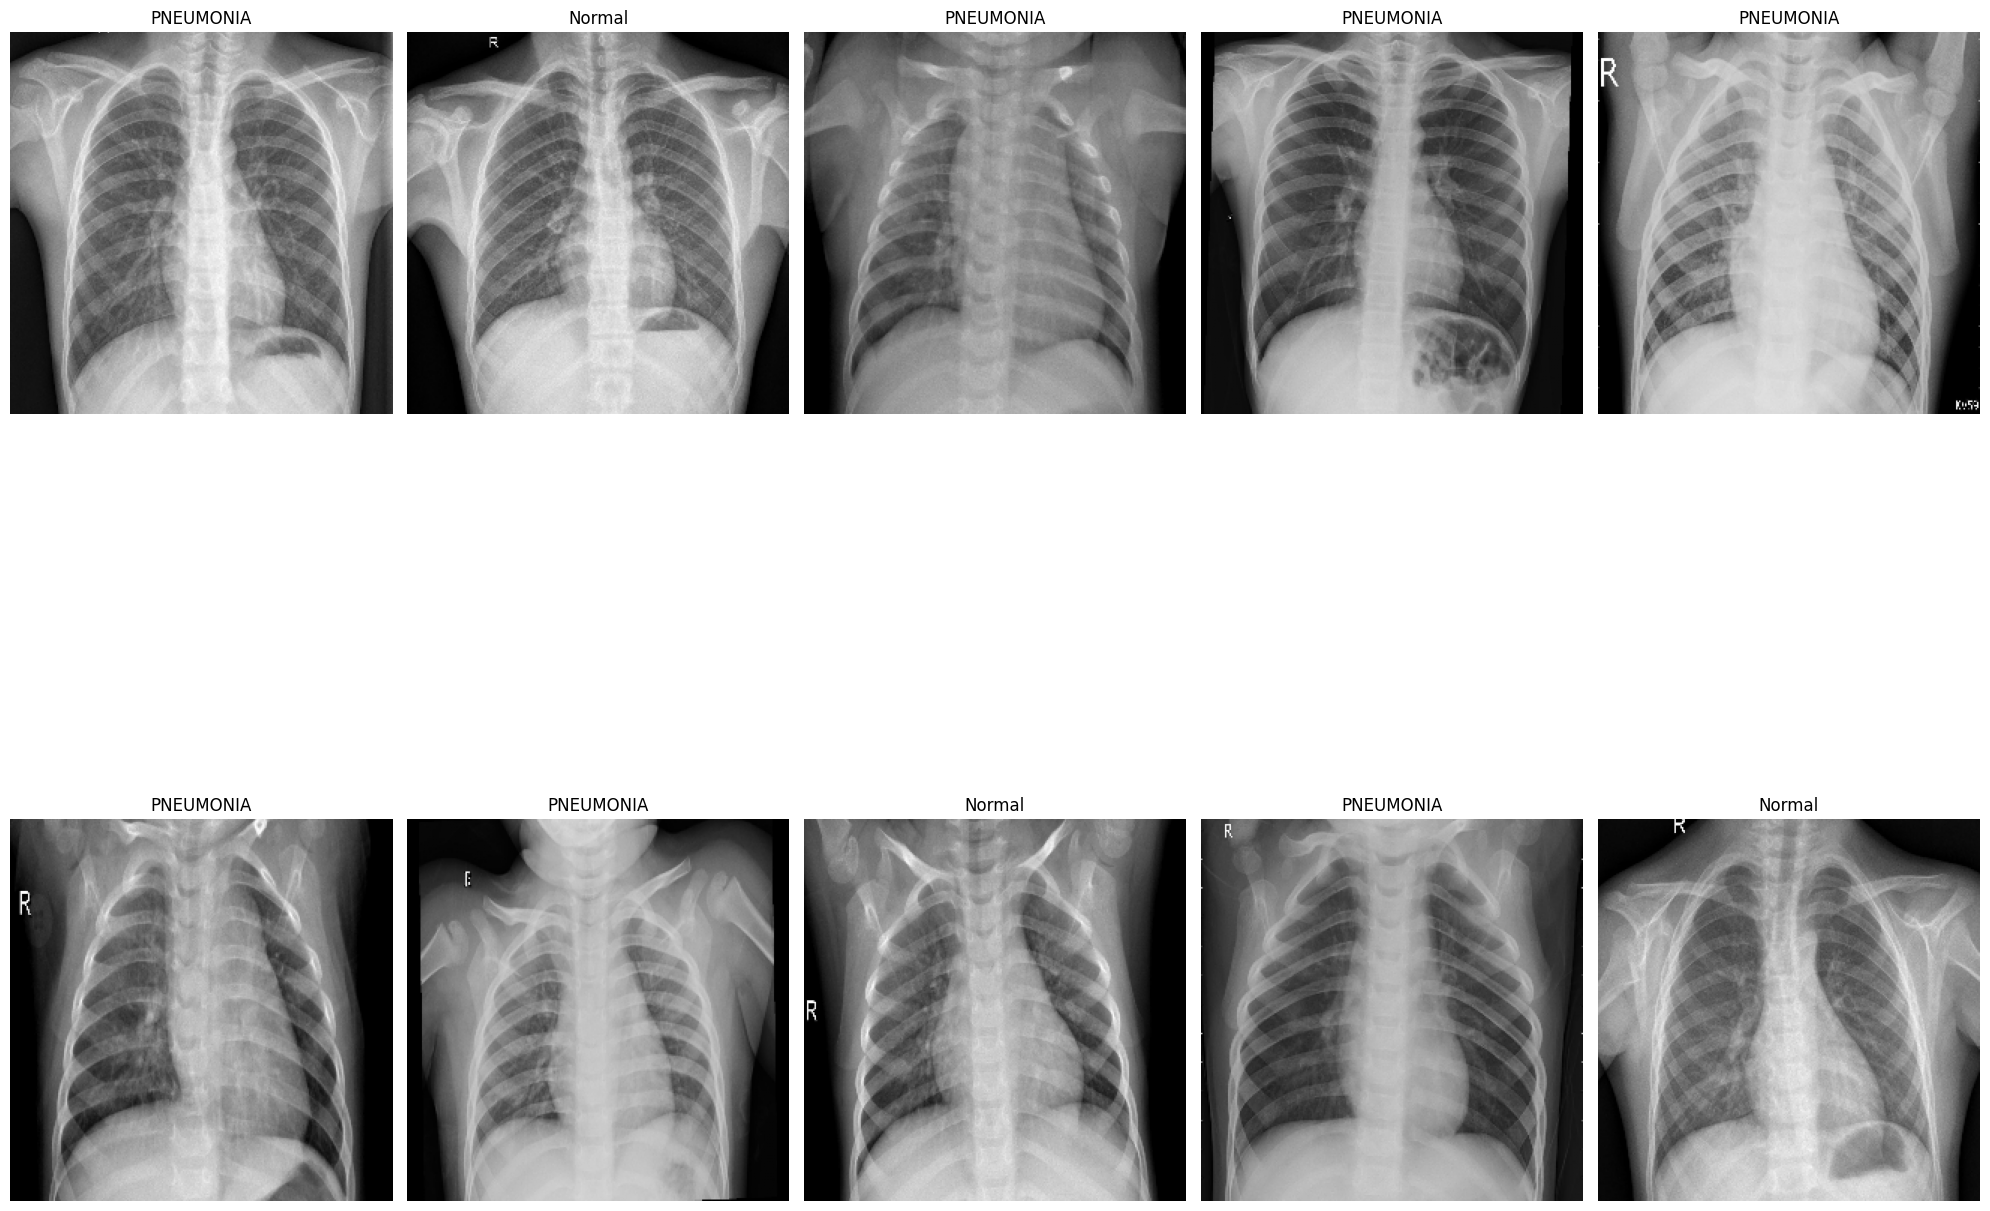

In [19]:
import matplotlib.pyplot as plt

# Number of images to display
num_images_to_display = 10

plt.figure(figsize=(20, 20))
for i, (img, pred) in enumerate(zip(test_list[:num_images_to_display], PREDS[:num_images_to_display])):
    plt.subplot(2, 5, i + 1)
    if pred == 0:
        pred_label = 'Normal'
    elif pred == 1:
        pred_label = 'PNEUMONIA'
    plt.imshow(img, cmap='gray')
    plt.title(pred_label)
    plt.axis('off')

plt.tight_layout()
plt.show()


In [20]:
model.save('CNN_model.h5')
print("saved")

saved


Results Analysis:

The final model performs well in detecting diseases from medical images, showing high accuracy it can reliably identify both positive and negative cases.

Implications:

The model's accuracy suggests it could be a valuable tool for medical diagnostics, aiding in early detection and treatment planning.

Areas for Improvement:

Data Augmentation: Add more varied samples.
Hyperparameter Tuning: Refine settings for better performance.
Advanced Models: Explore deeper neural networks or ensemble methods.

Continued improvements and validation are necessary for clinical reliability.